In [1]:
import os

from torchvision import datasets
from torchvision import transforms as T
import matplotlib.pyplot as plt
import torch

In [2]:
transform = T.Compose(
    [
        T.ToTensor(),
        T.Normalize((0, 0, 0), (1, 1, 1))
    ]
)

In [3]:
data_dir = "data/AFRIFASHION1600"
splits = ["train", "val"]

fashion_dataset = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        transform=transform
    )
    for x in splits
}

In [4]:
img = fashion_dataset["train"][0][0]

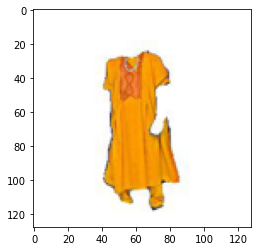

In [5]:
plt.imshow(img.numpy().transpose(1, 2, 0))

In [6]:
def get_normalization_stats(dataset):
    """
    Why and How to normalize data – Object detection on image in PyTorch Part 1
    https://inside-machinelearning.com/en/why-and-how-to-normalize-data-object-detection-on-image-in-pytorch-part-1/
    """
    imgs = torch.stack([img for img, _ in dataset], dim=3)
    imgs_view = imgs.view(3, -1)
    mean = imgs_view.mean(dim=1)
    std = imgs_view.std(dim=1)

    return mean, std

In [7]:
mean, std = get_normalization_stats(fashion_dataset["train"])

In [8]:
print(f"Mean: {mean}")
print(f"Std: {std}")

Mean: tensor([0.8321, 0.8131, 0.8179])
Std: tensor([0.3037, 0.3211, 0.3159])


In [9]:
norm = T.Normalize(mean.tolist(), std.tolist())

In [16]:
normed_img = norm(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


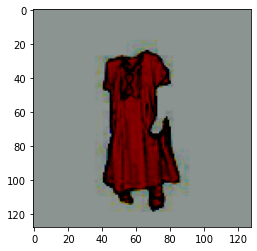

In [17]:
plt.imshow(normed_img.permute(1, 2, 0))

In [14]:
denorm_mean = -1 * mean / std
denorm_std = 1 / std

print(f"Denormalization Mean: {denorm_mean}")
print(f"Denormalization Std: {denorm_std}")

Denormalization Mean: tensor([-2.7393, -2.5321, -2.5890])
Denormalization Std: tensor([3.2922, 3.1142, 3.1654])


In [15]:
denorm = T.Normalize(mean=denorm_mean.tolist(), std=denorm_std.tolist())

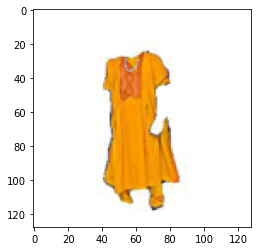

In [19]:
plt.imshow(denorm(normed_img).permute(1, 2, 0))